In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from random import random



In [2]:
#Funciones 
def DeP(theta):
    mu=0
    sigma=0.1
    return np.exp((-(theta-mu)**2)/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))

def deltaS(phi_1,phi_2):
    return -np.log(DeP(phi_1)/DeP(phi_2))
    

In [3]:
#Variable Aleatoria
theta=[]
for i in range(1000):
    t=random()
    t= -np.pi + (t*(np.pi-(-np.pi)))
    theta.append(t)

In [4]:
#Distribucion de theta
P=[]
for i in range(len(theta)):
    P.append(DeP(theta[i]))


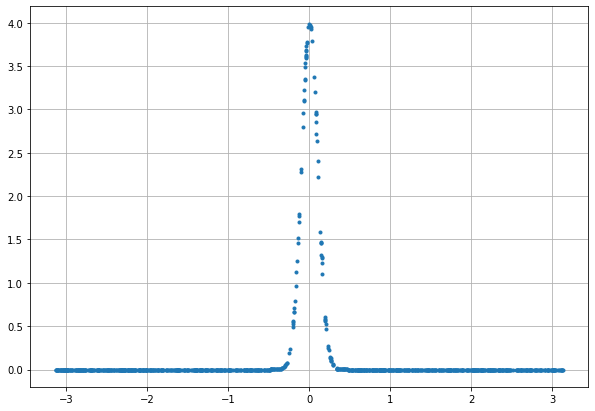

In [5]:
plt.figure(figsize=(10,7))
plt.plot(theta,P,'.')
plt.grid()

In [6]:
#Metropolis 
phi=[]
phi_0 = -np.pi + (random()*(np.pi-(-np.pi)))
phi.append(phi_0)
while len(phi)<len(theta):
    phi_p = -np.pi + (random()*(np.pi-(-np.pi)))    
    if deltaS(phi_p,phi_0)<0:
        phi_1=phi_p
        phi.append(phi_1)
        #print (phi_1)
        phi_0=phi_1    
    elif deltaS(phi_p,phi_0)>0:
        L=DeP(phi_p)/DeP(phi_0)
        #print (x,L)
        x=random()
        if x<L:
            phi_1=phi_p
            phi.append(phi_1)
            #print (phi_1)
            phi_0=phi_1
        elif x>L:
            continue
            


/Volumes/MacII/Users/andres-sws/Documents/Python3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


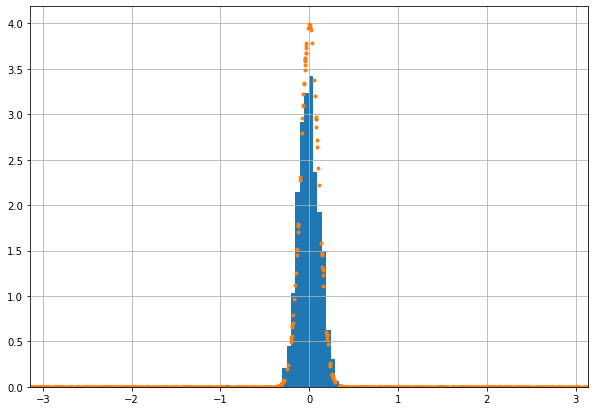

In [7]:
plt.figure(figsize=(10,7))
plt.hist(phi,bins=50, normed=True)
plt.xlim(-np.pi,np.pi)
plt.plot(theta,P,'.')
plt.grid()